In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score





In [12]:

# Carregar os arquivos Excel
counts = pd.read_excel("C:\\Users\\afons\\Downloads\\mRNA_TCGA_PRAD_counts.xlsx")
metadata = pd.read_excel("C:\\Users\\afons\\Downloads\\mRNA_TCGA_PRAD_metadata.xlsx")

# Mostrar o número de linhas e colunas de cada DataFrame e as primeiras colunas de dataFrame
print("mRNA_TCGA_PRAD_counts.xlsx:")
print(f"Número de linhas: {counts.shape[0]}, Número de colunas: {counts.shape[1]}")
print(counts.columns[:10].tolist())

print("\nmRNA_TCGA_PRAD_metadata.xlsx:")
print(f"Número de linhas: {metadata.shape[0]}, Número de colunas: {metadata.shape[1]}")
print(metadata.columns[:10].tolist())



mRNA_TCGA_PRAD_counts.xlsx:
Número de linhas: 60660, Número de colunas: 555
['Unnamed: 0', 'TCGA-KK-A8IG-01A-11R-A36G-07', 'TCGA-G9-A9S7-01A-11R-A41O-07', 'TCGA-EJ-7789-11A-01R-2118-07', 'TCGA-YL-A8SA-01A-21R-A37L-07', 'TCGA-XK-AAJ3-01A-11R-A41O-07', 'TCGA-EJ-7785-11A-01R-2118-07', 'TCGA-FC-7708-01A-11R-2118-07', 'TCGA-G9-6364-01A-21R-1789-07', 'TCGA-EJ-7328-01A-31R-2118-07']

mRNA_TCGA_PRAD_metadata.xlsx:
Número de linhas: 554, Número de colunas: 152
['Unnamed: 0', 'barcode', 'patient', 'sample', 'shortLetterCode', 'definition', 'sample_submitter_id', 'sample_type_id', 'tumor_descriptor', 'sample_id']


In [15]:
# Carregar o arquivo Excel com metadados
metadata = pd.read_excel("C:\\Users\\afons\\Downloads\\mRNA_TCGA_PRAD_metadata.xlsx")

# Filtrar as colunas que são objetos e realmente contenham strings
string = [col for col in metadata.select_dtypes(include=['object']).columns if metadata[col].apply(lambda x: isinstance(x, str)).any()]

# Função para identificar colunas com mais de 50 contagens de um valor específico
def count_specific_value(df, value, threshold=50):
    return df.apply(lambda x: x.str.lower().str.count(value).sum() > threshold)

# Identificar colunas com mais de 50 contagens de "not reported" ou valores NA
rm_colunas = count_specific_value(metadata[string], "not reported").index[count_specific_value(metadata[string], "not reported")].tolist()
rm_colunas += amostras_meta.columns[metadata.isna().sum() > 50].tolist()

# Remover colunas identificadas
metadata_reduzido = amostras_meta.drop(columns=rm_colunas)

# Dimensões do DataFrame reduzido
print(f"Dimensões do DataFrame filtrado: {metadata_reduzido.shape}")

# Nomes das colunas do DataFrame das amostras filtrado
print(f"\nNomes das colunas do DataFrame das amostras filtrado: {metadata_reduzido.columns.values}")


Dimensões do DataFrame filtrado: (554, 49)

Nomes das colunas do DataFrame das amostras filtrado: ['Unnamed: 0' 'barcode' 'patient' 'sample' 'shortLetterCode' 'definition'
 'sample_submitter_id' 'sample_type_id' 'tumor_descriptor' 'sample_id'
 'sample_type' 'state' 'preservation_method' 'submitter_id'
 'specimen_type' 'is_ffpe' 'tissue_type' 'synchronous_malignancy'
 'days_to_diagnosis' 'tissue_or_organ_of_origin' 'days_to_last_follow_up'
 'age_at_diagnosis' 'primary_diagnosis' 'prior_malignancy'
 'year_of_diagnosis' 'secondary_gleason_grade' 'prior_treatment'
 'primary_gleason_grade' 'ajcc_pathologic_t' 'morphology'
 'ajcc_clinical_m' 'diagnosis_id' 'icd_10_code'
 'site_of_resection_or_biopsy' 'exposure_id' 'race' 'gender'
 'vital_status' 'age_at_index' 'days_to_birth' 'year_of_birth'
 'demographic_id' 'bcr_patient_barcode' 'primary_site' 'project_id'
 'disease_type' 'name' 'releasable' 'released']


In [18]:
amostras_meta_reduzido1 = metadata_reduzido[["vital_status", "age_at_index","race"]]
amostras_meta_reduzido1

,vital_status,age_at_index,race
0,Alive,55,white
1,Alive,55,white
2,Alive,66,black or african american
3,Alive,69,white
4,Alive,56,white
...,...,...,...
549,Alive,61,asian
550,Alive,71,white
551,Alive,62,white
552,Alive,57,white


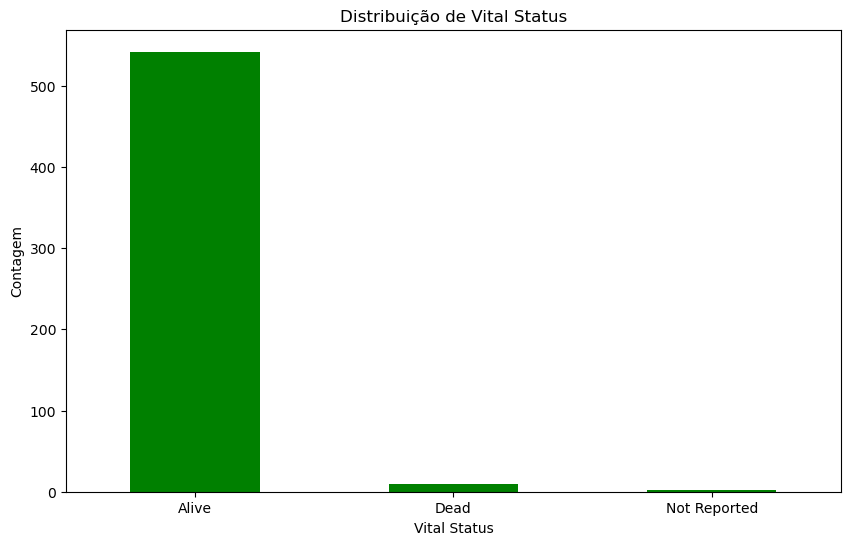

In [31]:
# Contar as ocorrências de cada valor em 'vital_status'
vital_status_counts = metadata_reduzido['vital_status'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
vital_status_counts.plot(kind='bar', color='green')
plt.title('Distribuição de Vital Status')
plt.xlabel('Vital Status')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

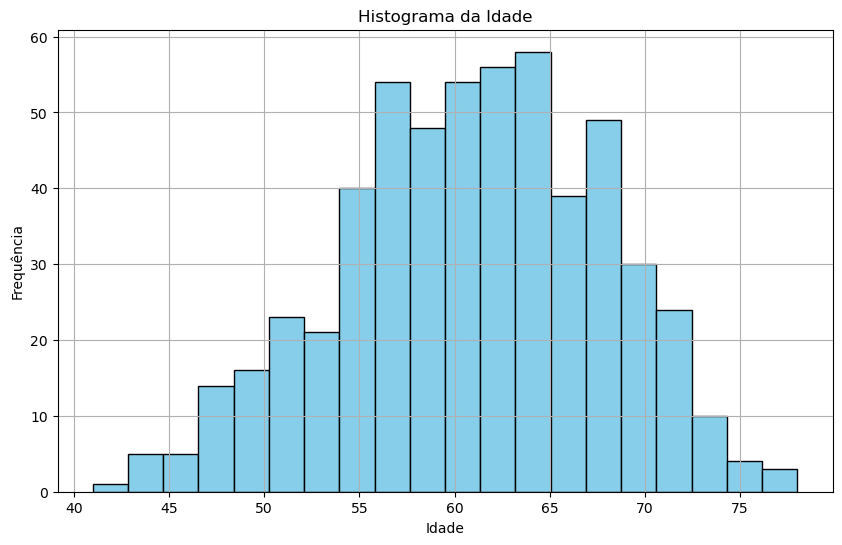

In [20]:
# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(amostras_meta_reduzido1['age_at_index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

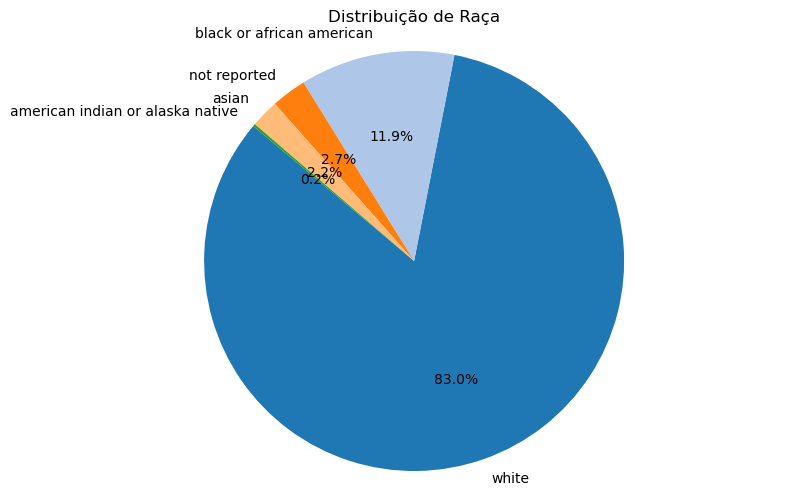

In [21]:
# Contar as ocorrências de cada raça
race_counts = amostras_meta_reduzido1['race'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(10, 6))
race_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribuição de Raça')
plt.ylabel('')
plt.axis('equal')  # Assegura que a pizza seja desenhada como um círculo
plt.show()

In [22]:
# Dividir os dados em grupos de acordo com o status vital
grouped_data = {vital_status: amostras_meta_reduzido1['age_at_index'][amostras_meta_reduzido1['vital_status'] == vital_status] for vital_status in amostras_meta_reduzido1['vital_status'].unique()}

# Realizar o teste de hipótese (teste t de Student) para comparar as médias de idade entre os grupos
test_statistic, p_value = stats.f_oneway(*grouped_data.values())

# Imprimir o resultado do teste
print("Resultado do teste de hipótese:")
print(f"Estatística de teste: {test_statistic}")
print(f"Valor p: {p_value}")

Resultado do teste de hipótese:
Estatística de teste: 1.4816176981510145
Valor p: 0.22817374246178754


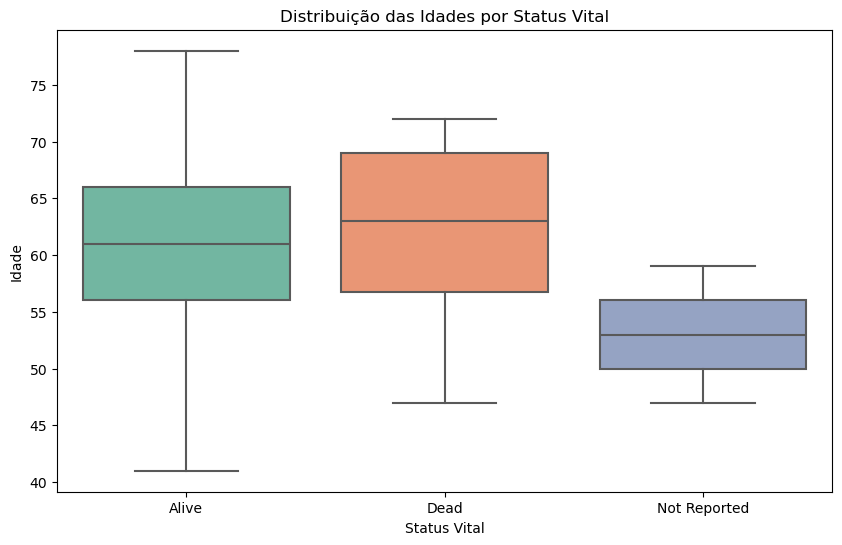

In [23]:
# Selecionar colunas específicas
amostras_meta_reduzido1 = metadata_reduzido[["vital_status", "primary_diagnosis", "age_at_index","race"]]

# Remover amostras com 'not reported' em 'vital_status'
amostras_meta_reduzido1 = amostras_meta_reduzido1[amostras_meta_reduzido1['vital_status'] != 'not reported']

# Criar o gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='vital_status', y='age_at_index', data=amostras_meta_reduzido1, palette='Set2')
plt.title('Distribuição das Idades por Status Vital')
plt.xlabel('Status Vital')
plt.ylabel('Idade')
plt.show()



In [24]:
#Não está a importar o pyDESeq2

#%pip install pyDESeq2

# Remoção dos genes com menos de 20 contagens em pelo menos 4 amostras
genes_manter = counts_df[(counts_df.iloc[:, 1:] >= 20).sum(axis=1) >= 4].iloc[:, 1:]
counts_df_filtrado = counts_df.iloc[genes_manter.index]

# Criar um objeto pyDESeq2
deseq = pyDESeq2(count_matrix=counts_df_filtrado)

# Executar a análise de expressão diferencial
deseq.run_deseq()

# Obter os resultados da análise
results = deseq.get_deseq_result()

# Exibir as estatísticas de expressão diferencial para cada gene
print(results[['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_name']])

NameError: name 'pyDESeq2' is not defined

Dimensão do DataFrame filtrado (genes e amostras): (29023, 555)


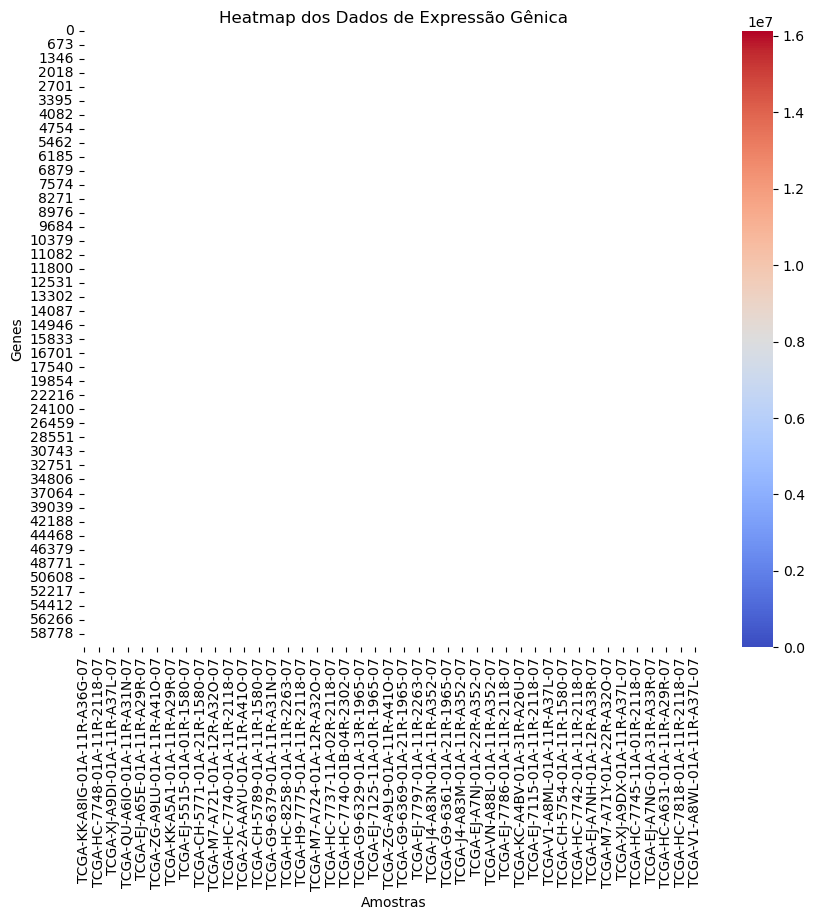

In [25]:
#Heat map se funcionasse

# Remoção dos genes com menos de 20 contagens em pelo menos 4 amostras
genes_manter = counts_df[(counts_df.iloc[:, 1:] >= 20).sum(axis=1) >= 4].iloc[:, 1:]
counts_df_filtrado = counts_df.iloc[genes_manter.index]

# Impressão da dimensão do DataFrame filtrado (genes e amostras)
print("Dimensão do DataFrame filtrado (genes e amostras):", counts_df_filtrado.shape)

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(counts_df_filtrado.iloc[:, 1:], cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap dos Dados de Expressão Gênica')
plt.xlabel('Amostras')
plt.ylabel('Genes')
plt.show()

In [26]:
# Remoção dos genes com menos de 20 contagens em pelo menos 4 amostras
genes_manter = counts_df[(counts_df.iloc[:, 1:] >= 20).sum(axis=1) >= 4].iloc[:, 1:]
counts_df_filtrado = counts_df.iloc[genes_manter.index]

# Impressão da dimensão do DataFrame filtrado (genes e amostras)
print("Dimensão do DataFrame filtrado (genes e amostras):", counts_df_filtrado.shape)

Dimensão do DataFrame filtrado (genes e amostras): (29023, 555)


   Componente Principal 1  Componente Principal 2 Vital Status
0                1.905977                0.781085        Alive
1                0.319824               -0.925799        Alive
2               -0.518102                0.527692        Alive
3               -1.367716                0.255736        Alive
4                0.689706               -0.313654        Alive


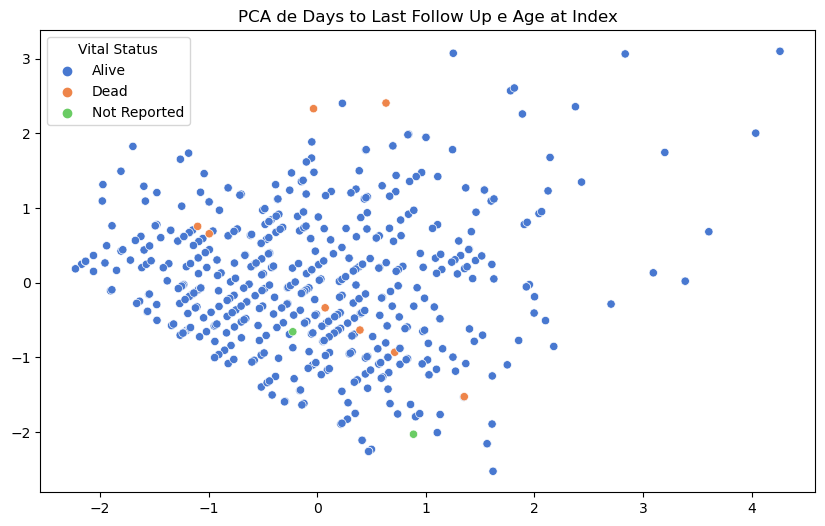

In [27]:
# Carregar o DataFrame
metadata_df = pd.read_excel("C:\\Users\\afons\\Downloads\\mRNA_TCGA_PRAD_metadata.xlsx")

# Selecionar as colunas 'days_to_last_follow_up' e 'age_at_index'
X = metadata_df[['days_to_last_follow_up', 'age_at_index']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preencher os valores ausentes com a mediana
imputer = SimpleImputer(strategy='median')
X_filled = imputer.fit_transform(X_scaled)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filled)

# Criar DataFrame para os componentes principais
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Adicionar a variável alvo ao DataFrame PCA
pca_df['Vital Status'] = metadata_df['vital_status']

# Visualizar os dados do PCA
print(pca_df.head())

# Gráfico de dispersão do PCA com cores diferentes para cada categoria de 'Vital Status'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Componente Principal 1', y='Componente Principal 2', hue='Vital Status', palette='muted')
plt.xlabel('')
plt.ylabel('')
plt.title('PCA de Days to Last Follow Up e Age at Index')
plt.legend(title='Vital Status')
plt.show()



     t-SNE 1    t-SNE 2 Vital Status
0  18.452501  11.324070        Alive
1   9.034870 -15.742330        Alive
2  -8.285263  10.514360        Alive
3 -21.997660   5.104176        Alive
4  11.964574  -5.458562        Alive


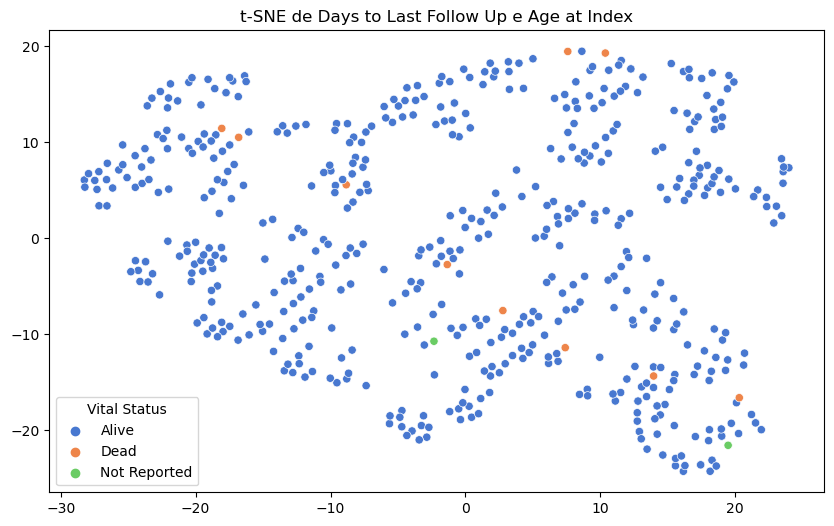

In [28]:
# Carregar o DataFrame
metadata_df = pd.read_excel("C:\\Users\\afons\\Downloads\\mRNA_TCGA_PRAD_metadata.xlsx")

# Selecionar as colunas 'days_to_last_follow_up' e 'age_at_index'
X = metadata_df[['days_to_last_follow_up', 'age_at_index']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preencher os valores ausentes com a mediana
imputer = SimpleImputer(strategy='median')
X_filled = imputer.fit_transform(X_scaled)

# Aplicar t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_filled)

# Criar DataFrame para os componentes principais
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])

# Adicionar a variável alvo ao DataFrame t-SNE
tsne_df['Vital Status'] = metadata_df['vital_status']

# Visualizar os dados do t-SNE
print(tsne_df.head())

# Gráfico de dispersão do t-SNE com cores diferentes para cada categoria de 'Vital Status'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='t-SNE 1', y='t-SNE 2', hue='Vital Status', palette='muted')
plt.xlabel('')
plt.ylabel('')
plt.title('t-SNE de Days to Last Follow Up e Age at Index')
plt.legend(title='Vital Status')
plt.show()


C:\Users\afons\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


     t-SNE 1    t-SNE 2  Cluster
0  18.452501  11.324070        2
1   9.034870 -15.742330        0
2  -8.285263  10.514360        1
3 -21.997660   5.104176        1
4  11.964574  -5.458562        0


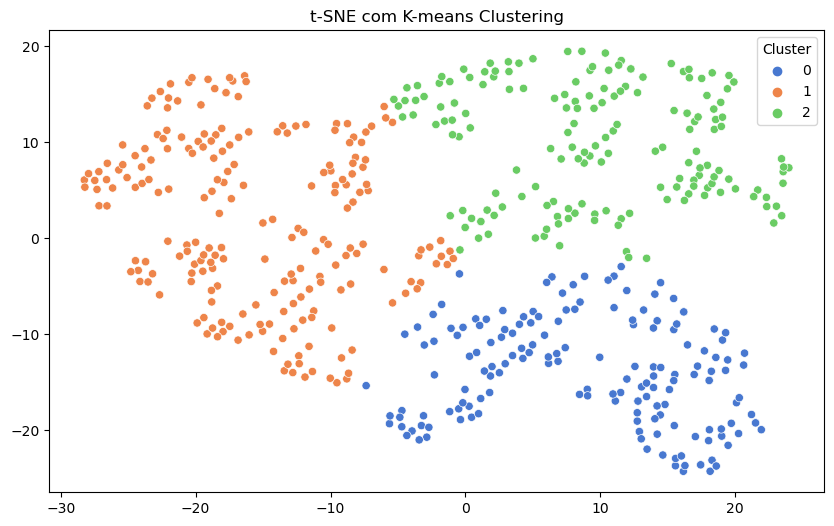

In [29]:
# Carregar o DataFrame
metadata_df = pd.read_excel("C:\\Users\\afons\\Downloads\\mRNA_TCGA_PRAD_metadata.xlsx")

# Selecionar as colunas 'days_to_last_follow_up' e 'age_at_index'
X = metadata_df[['days_to_last_follow_up', 'age_at_index']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preencher os valores ausentes com a mediana
imputer = SimpleImputer(strategy='median')
X_filled = imputer.fit_transform(X_scaled)

# Aplicar t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_filled)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Criar DataFrame para os componentes principais
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])

# Adicionar os clusters ao DataFrame t-SNE
tsne_df['Cluster'] = clusters

# Visualizar os dados do t-SNE com clusters
print(tsne_df.head())

# Gráfico de dispersão do t-SNE com cores diferentes para cada cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='t-SNE 1', y='t-SNE 2', hue='Cluster', palette='muted', legend='full')
plt.xlabel('')
plt.ylabel('')
plt.title('t-SNE com K-means Clustering')
plt.show()


In [30]:
# Carregar o DataFrame
metadata_df = pd.read_excel("C:\\Users\\afons\\Downloads\\mRNA_TCGA_PRAD_metadata.xlsx")

# Selecionar as colunas 'days_to_last_follow_up' e 'age_at_index'
X = metadata_df[['days_to_last_follow_up', 'age_at_index']]
y = metadata_df['vital_status']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preencher os valores ausentes com a mediana
imputer = SimpleImputer(strategy='median')
X_filled = imputer.fit_transform(X_scaled)

# Aplicar t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_filled)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Criar o classificador k-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o classificador
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acuracy do k-Nearest Neighbors:", accuracy)


Acuracy do k-Nearest Neighbors: 0.9819819819819819
